# IMPORTING PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Loading the dataset and performing EDA

In [3]:
df1 = pd.read_csv(r"C:\Users\pandi\Gradious assignments\Machine Learning\Assignment 1\Customer-Lifetime-Value-Prediction (dataset).csv")
df1.head()

,State,Coverage,Education,Emp_Status,Gender,Income,Loc_Code,M_Status,M_Prem,Mo_Claim,Mo_Policy,N_Complaints,N_Policies,P_Type,S_Channel,T_Claims,V_Class,V_Size,CLV
0,Washington,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Agent,384.811147,Two-Door Car,Medsize,2764
1,Nevada,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Agent,566.472247,Two-Door Car,Medsize,12887
2,Washington,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Agent,138.130879,Four-Door Car,Medsize,2814
3,Oregon,Basic,Bachelor,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Web,159.383042,Two-Door Car,Medsize,8256
4,Oregon,Basic,College,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Agent,321.600000,Four-Door Car,Medsize,5381


In [4]:
df1.shape

(6817, 19)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         6817 non-null   object 
 1   Coverage      6817 non-null   object 
 2   Education     6817 non-null   object 
 3   Emp_Status    6817 non-null   object 
 4   Gender        6817 non-null   object 
 5   Income        6817 non-null   int64  
 6   Loc_Code      6817 non-null   object 
 7   M_Status      6817 non-null   object 
 8   M_Prem        6817 non-null   int64  
 9   Mo_Claim      6817 non-null   int64  
 10  Mo_Policy     6817 non-null   int64  
 11  N_Complaints  6817 non-null   int64  
 12  N_Policies    6817 non-null   int64  
 13  P_Type        6817 non-null   object 
 14  S_Channel     6817 non-null   object 
 15  T_Claims      6817 non-null   float64
 16  V_Class       6817 non-null   object 
 17  V_Size        6817 non-null   object 
 18  CLV           6817 non-null 

In [6]:
# Handling Null values
df1.isna().sum()

State           0
Coverage        0
Education       0
Emp_Status      0
Gender          0
Income          0
Loc_Code        0
M_Status        0
M_Prem          0
Mo_Claim        0
Mo_Policy       0
N_Complaints    0
N_Policies      0
P_Type          0
S_Channel       0
T_Claims        0
V_Class         0
V_Size          0
CLV             0
dtype: int64

From the above line we can infer that there are no null values in the dataset

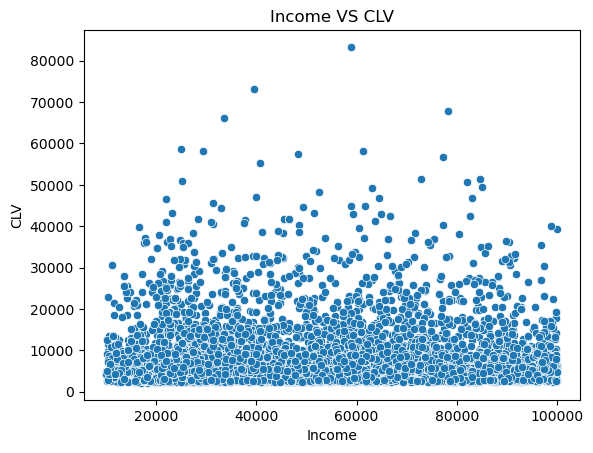

In [7]:
# Plotting the relationship between income and clv

sns.scatterplot(x= df1['Income'], y= df1['CLV'])
plt.title("Income VS CLV")
plt.show()

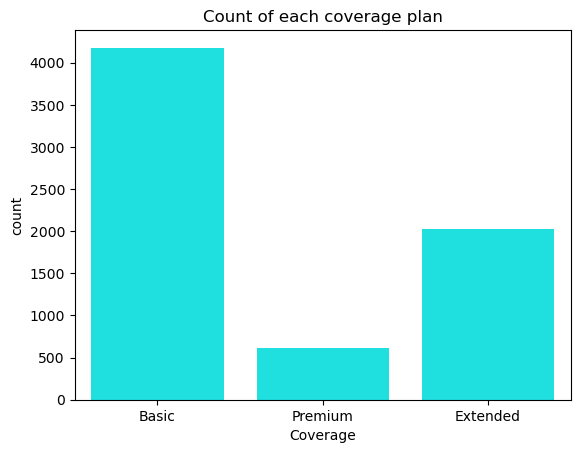

In [8]:
# Coverage plan counts
sns.countplot(x=df1['Coverage'], data = df1, color='cyan')
plt.title("Count of each coverage plan")
plt.show()

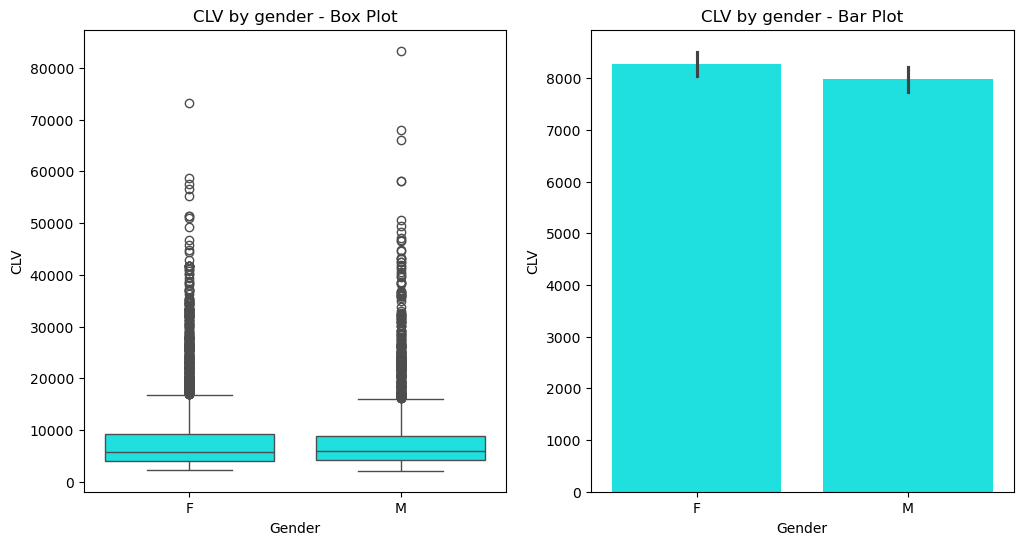

In [9]:
# CLV by gender
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(x=df1['Gender'], y=df1['CLV'], data = df1, color = 'cyan')
plt.title("CLV by gender - Box Plot")

plt.subplot(1,2,2)
sns.barplot(x=df1['Gender'], y=df1['CLV'], data = df1, color = 'cyan')
plt.title("CLV by gender - Bar Plot")

plt.tight_layout
plt.show()

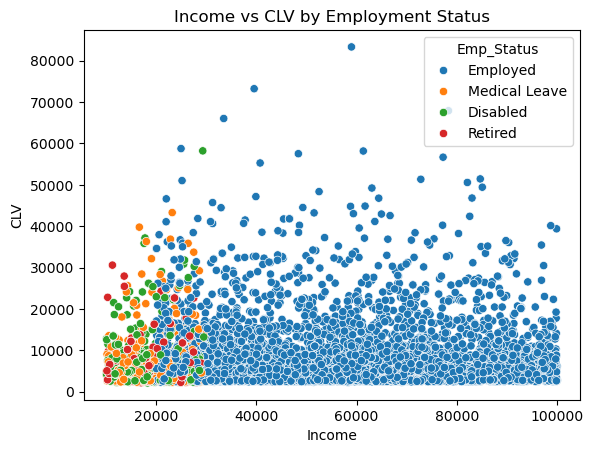

In [10]:
# Employment status vs Income vs CLV
sns.scatterplot(data=df1, x='Income', y= 'CLV', hue = 'Emp_Status')
plt.title('Income vs CLV by Employment Status')
plt.show()

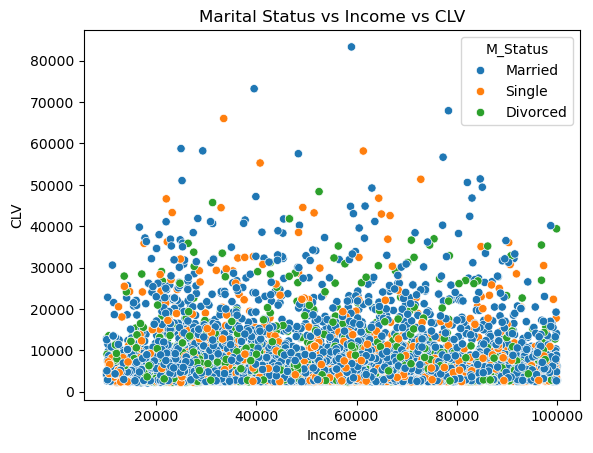

In [11]:
# Marital status vs Income vs CLV

sns.scatterplot(data=df1, x = 'Income', y= 'CLV', hue='M_Status')
plt.title("Marital Status vs Income vs CLV")
plt.show()


In [12]:
# Grouping numerical features and categorical features separately

num_cols = df1.select_dtypes(include=['int64','float64']).columns
cat_cols = df1.select_dtypes(exclude=['int64', 'float64']).columns

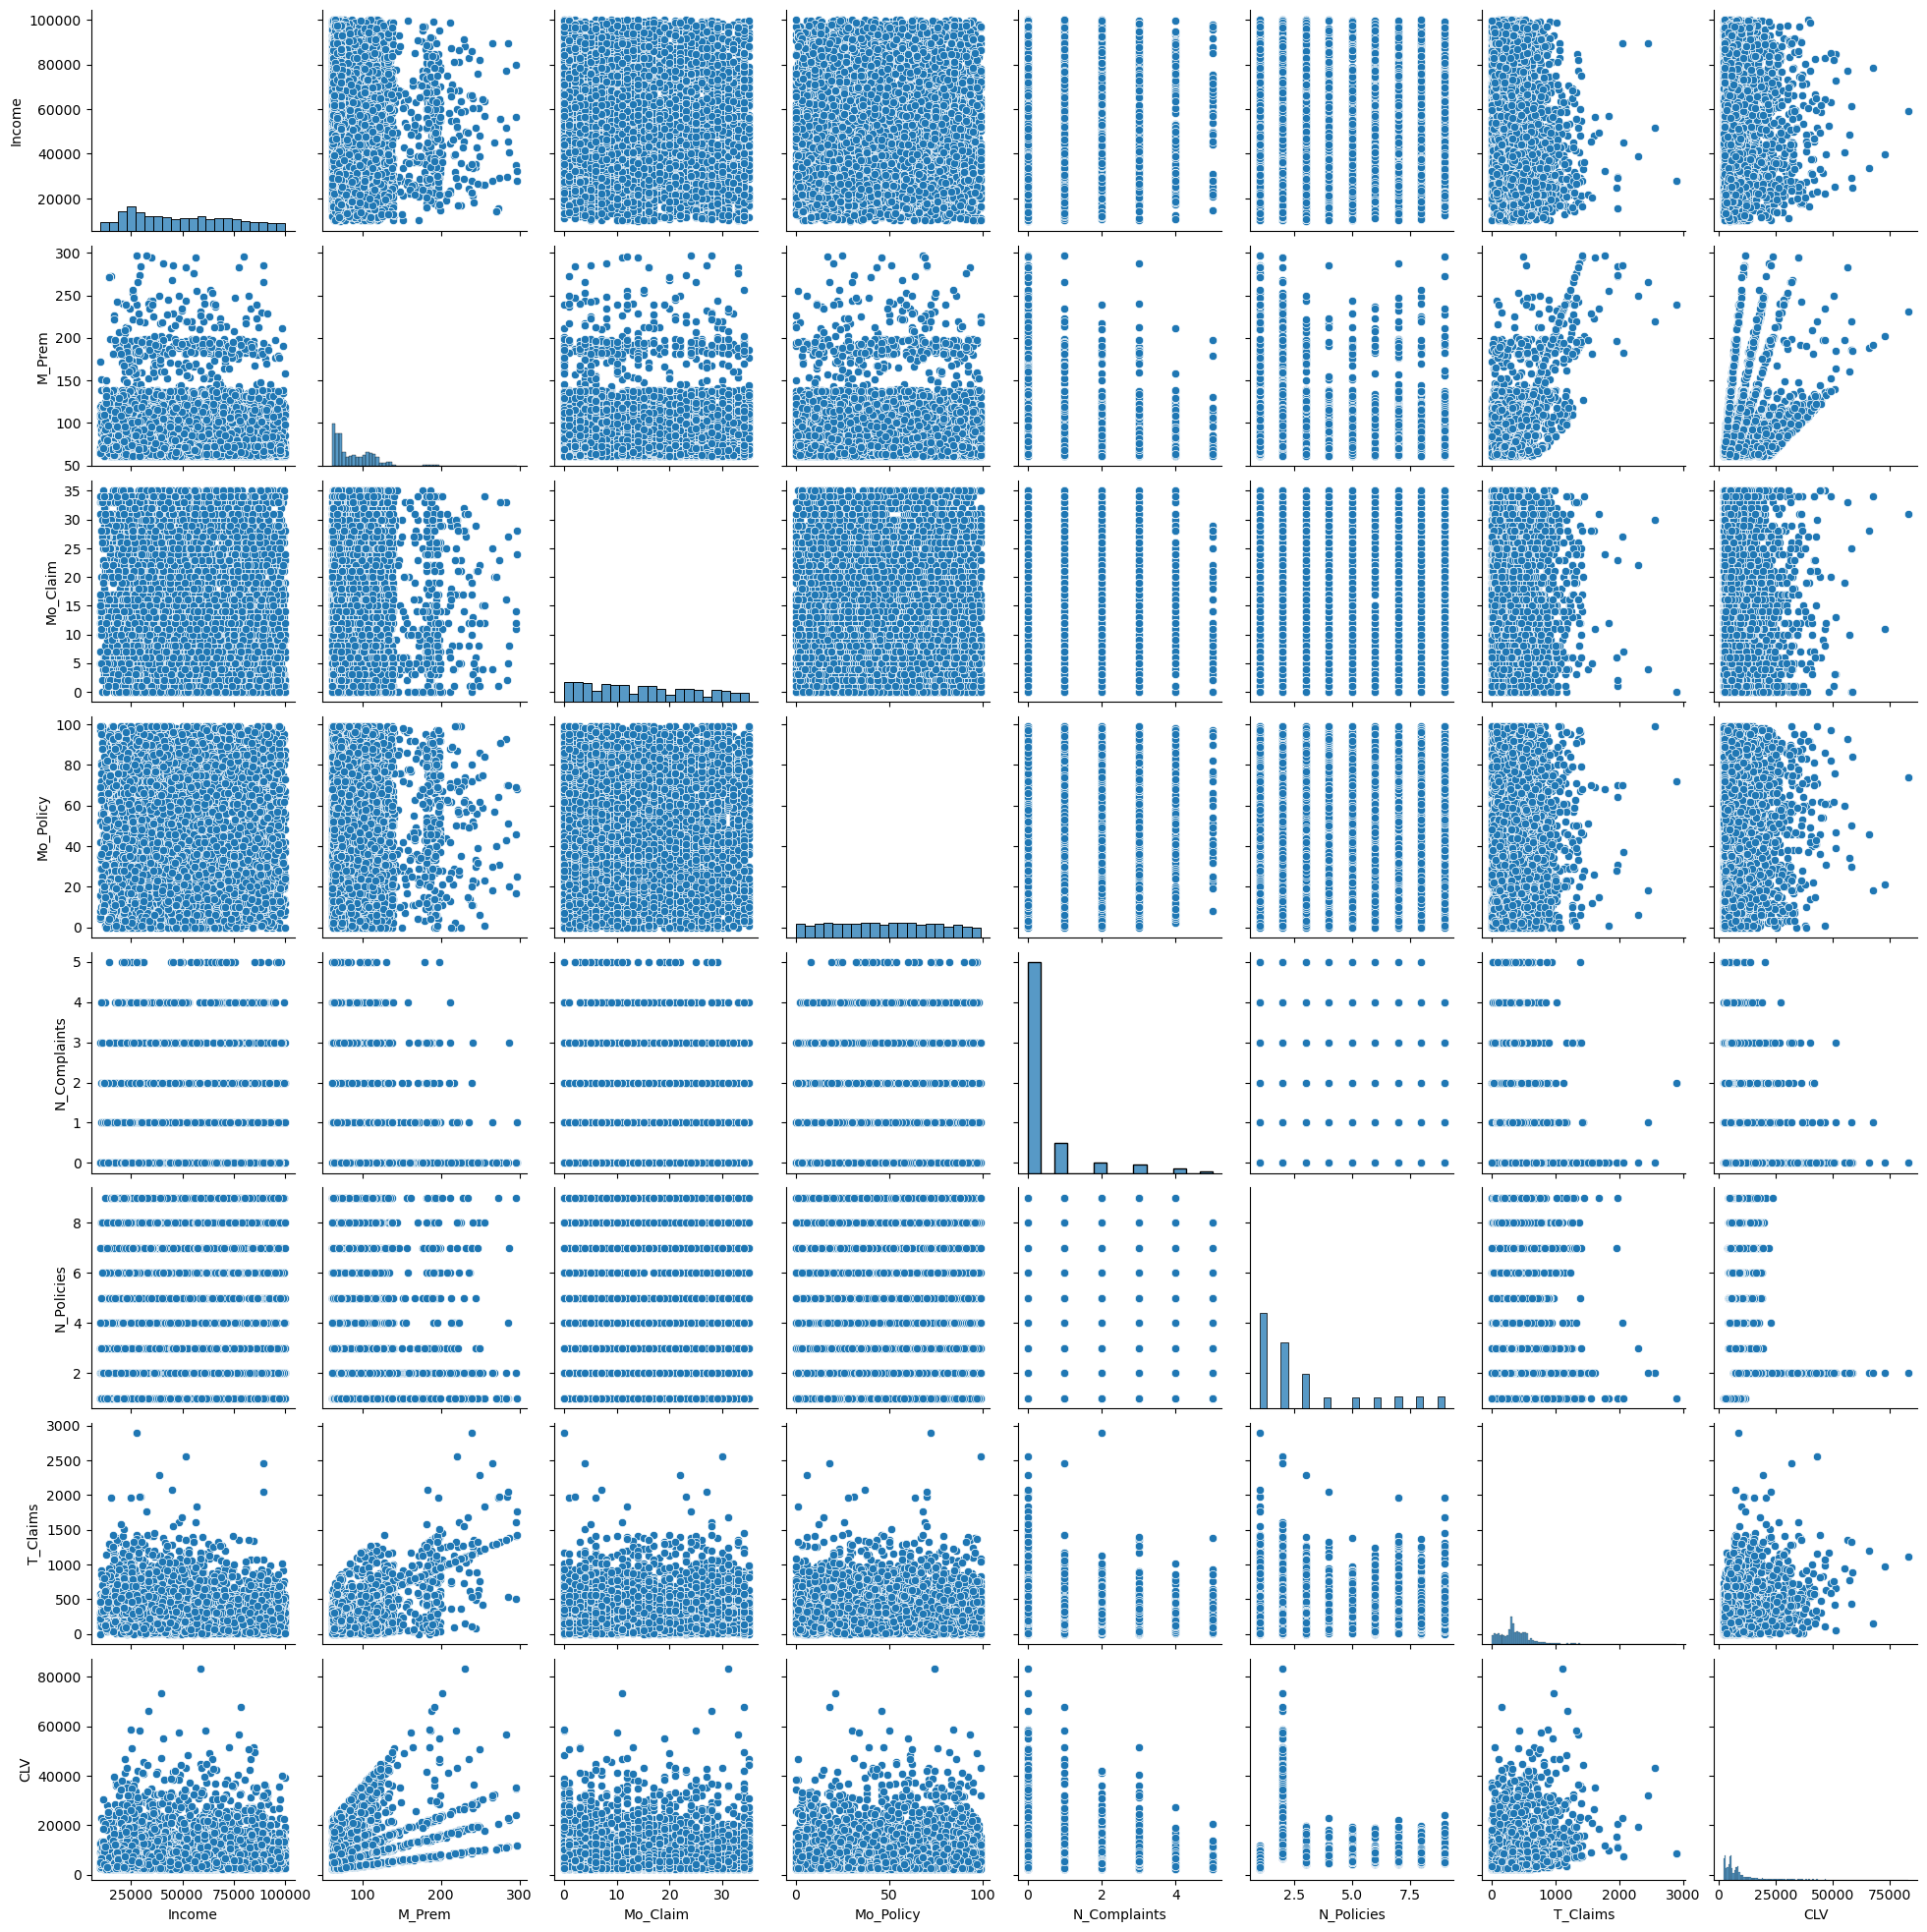

In [13]:
# Relationship of numerical features with clv
num_cols_no_tar = num_cols.drop('CLV')

sns.pairplot(data=df1[num_cols])
plt.show()

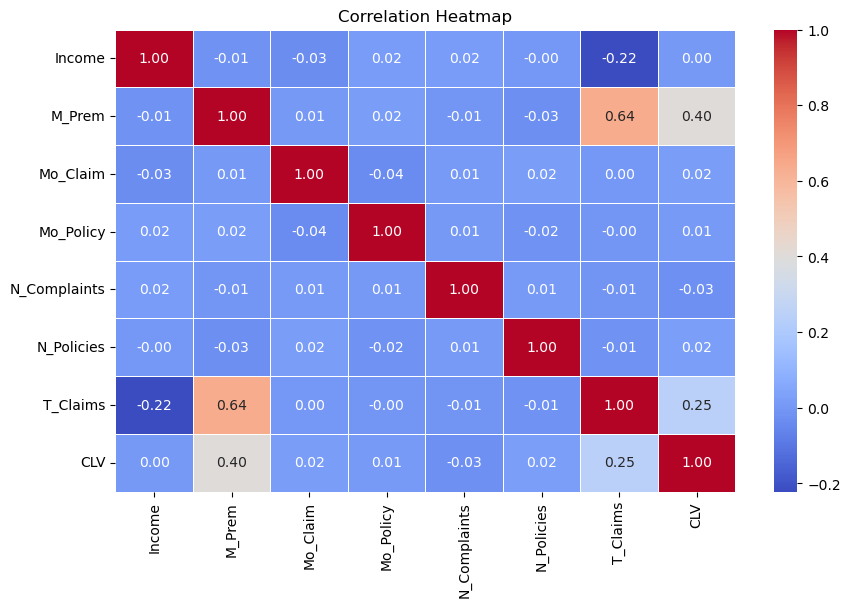

In [14]:
# Finding correlation between features

corr = df1.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm', fmt= '.2f', annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

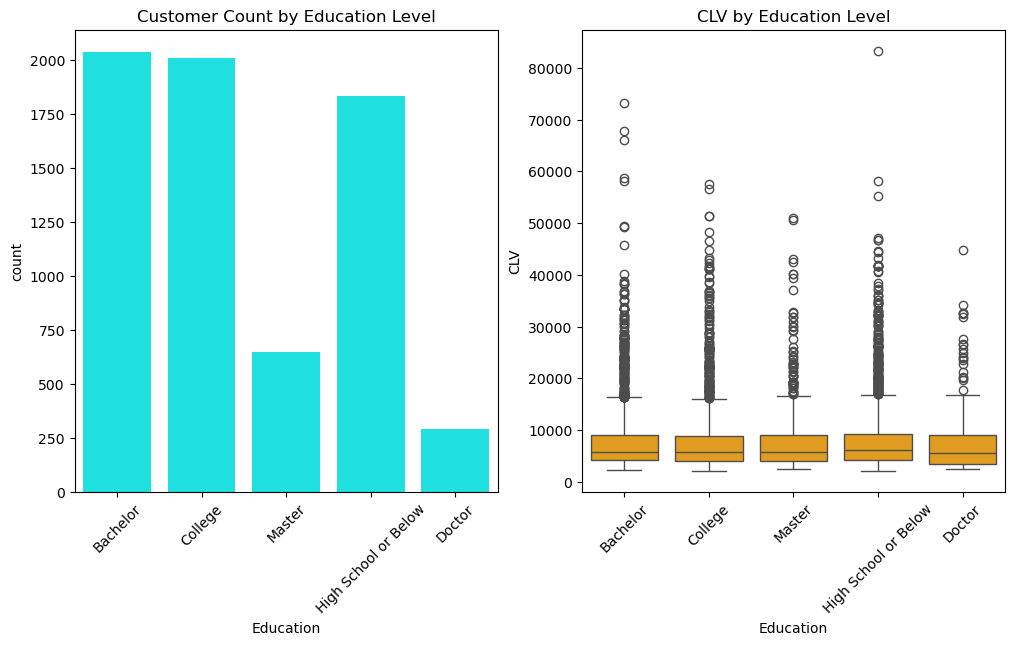

In [15]:
# Education vs CLV
plt.figure(figsize=(12,6))
# Count of each education level
plt.subplot(1,2,1)
sns.countplot(x='Education', data=df1, color='cyan')
plt.xticks(rotation=45)
plt.title('Customer Count by Education Level')


# Boxplot: CLV by Education
plt.subplot(1,2,2)
sns.boxplot(x='Education', y='CLV', data=df1, color='orange')
plt.xticks(rotation=45)
plt.title('CLV by Education Level')

plt.tight_layout
plt.show()


# Handling Outliers

In [16]:
# Handling outliers
df1.describe()

,Income,M_Prem,Mo_Claim,Mo_Policy,N_Complaints,N_Policies,T_Claims,CLV
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,50456.580461,92.963034,15.046941,47.832624,0.381840,2.951005,377.840789,8130.234707
std,24305.956566,34.615160,10.064762,27.895350,0.905048,2.390613,252.648952,6949.068193
min,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,2120.000000
25%,28432.000000,68.000000,6.000000,24.000000,0.000000,1.000000,210.100003,4091.000000
50%,48081.000000,83.000000,14.000000,48.000000,0.000000,2.000000,340.800000,5811.000000
75%,70187.000000,109.000000,23.000000,71.000000,0.000000,4.000000,498.612632,9076.000000
max,99981.000000,297.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,83325.000000


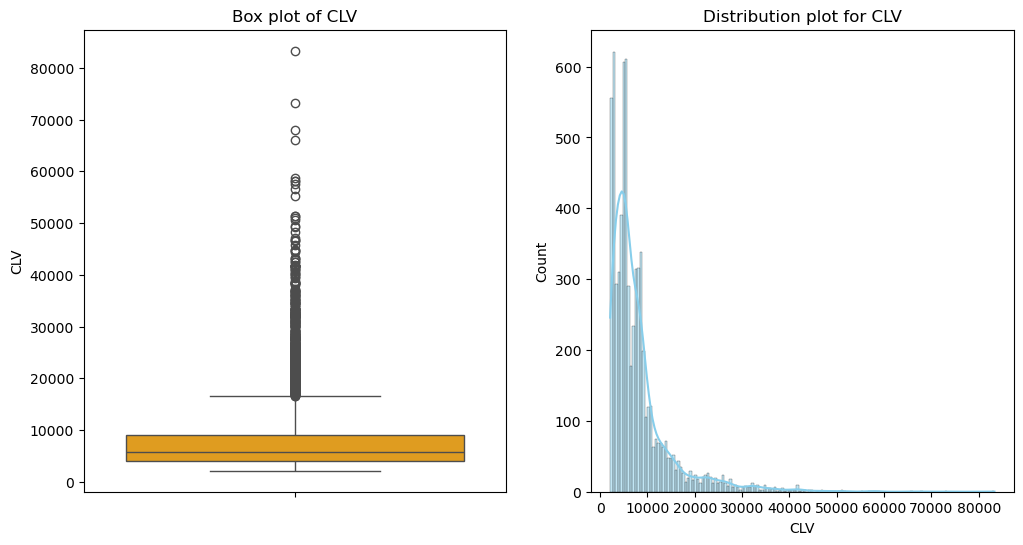

In [17]:
# Plotting the diagrams side by side to check for outliers in the target variable CLV

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df1['CLV'], color='orange')
plt.title("Box plot of CLV")


plt.subplot(1,2,2)
sns.histplot(df1['CLV'], kde=True, color='skyblue')
plt.title("Distribution plot for CLV")

plt.tight_layout
plt.show()

From the diagram we can infer that the data is positively skewed and there are less number of records on the right tail. So, we will clip the values and then apply log transformation to it.

In [18]:
count1 = (df1['CLV']>45000).sum()
count1

22

In [19]:
df1['Clipped_CLV'] = df1['CLV'].clip(upper=45000) #clipping the values to 45k
df1['CLV_log'] = np.log1p(df1['Clipped_CLV'])   # applying log transformation to reduces skewness in the data

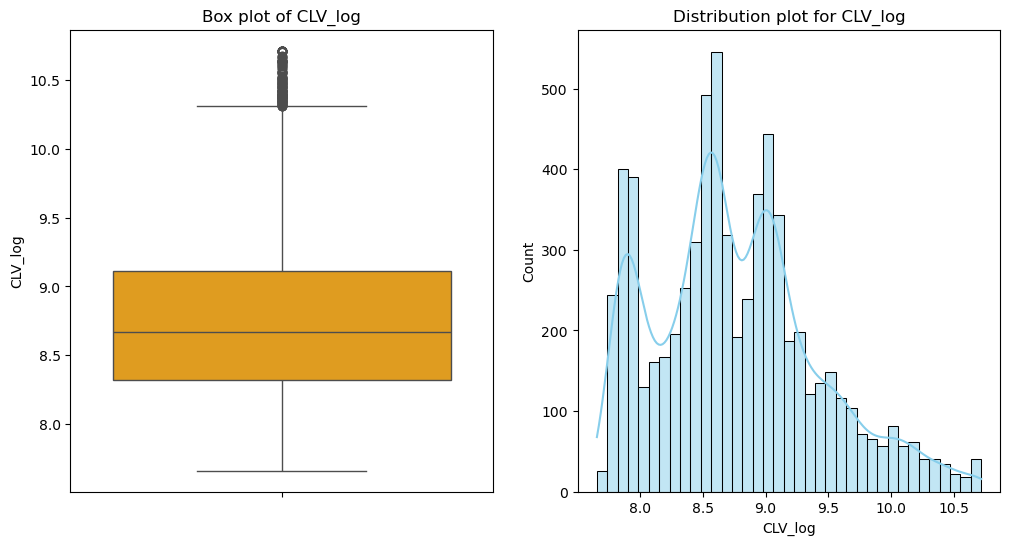

In [20]:
# Plotting the diagrams side by side to check for outliers in the target variable CLV

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df1['CLV_log'], color='orange')
plt.title("Box plot of CLV_log")


plt.subplot(1,2,2)
sns.histplot(df1['CLV_log'], kde=True, color='skyblue')
plt.title("Distribution plot for CLV_log")

plt.tight_layout
plt.show()

After clipping and log transforming we can see that the data is generalised without outliers. So, performing the same to other numerical features.

In [21]:
# detecting outliers using iqr

def detect_outliers_iqr(data, column):
    Q1= data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return data[(data[column] < lower) | (data[column] > upper)]

for col in num_cols[:len(num_cols)-1]:
    outliers = detect_outliers_iqr(df1, col)
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} outliers")

M_Prem: 326 outliers
N_Complaints: 1407 outliers
N_Policies: 310 outliers
T_Claims: 225 outliers


<Axes: xlabel='T_Claims', ylabel='Count'>

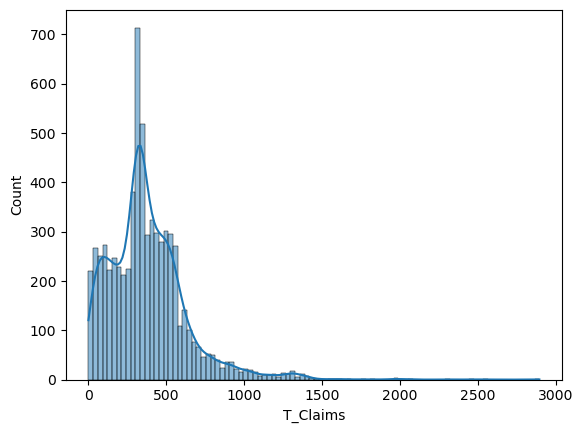

In [22]:
# Lets solve the outliers for these numerical categories one by one
# for T_Claims

sns.histplot(df1['T_Claims'], kde=True)

In [23]:
count_after = (df1['T_Claims']>1500).sum()
print(f"The count of values in T_Claim greater than 1500 is {count_after}")

The count of values in T_Claim greater than 1500 is 18


Since the values after 1500 in T_Claims is 18/6817 = 0.00264 i.e 0.26 percentage let's clip the values after 1500 to 1500

In [24]:
df1['T_Claims'] = df1['T_Claims'].clip(upper=1500)

The outliers in other numerical features seems reasonable and doesn't deviate too much.

Plotting numerical features 

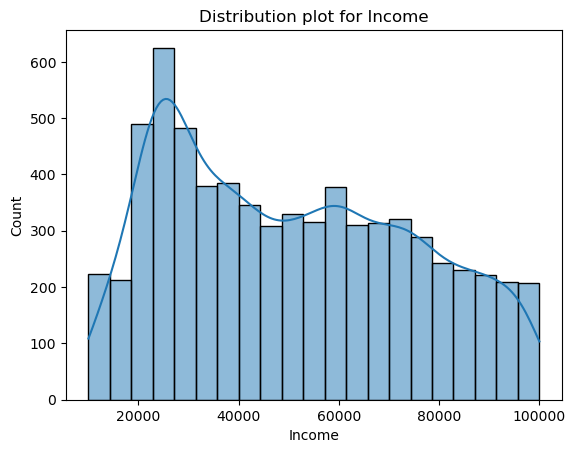

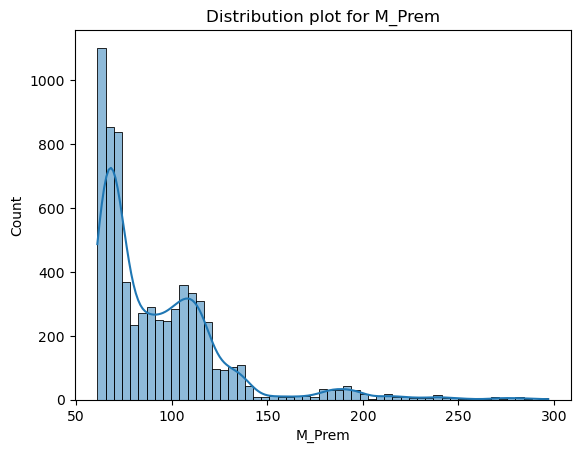

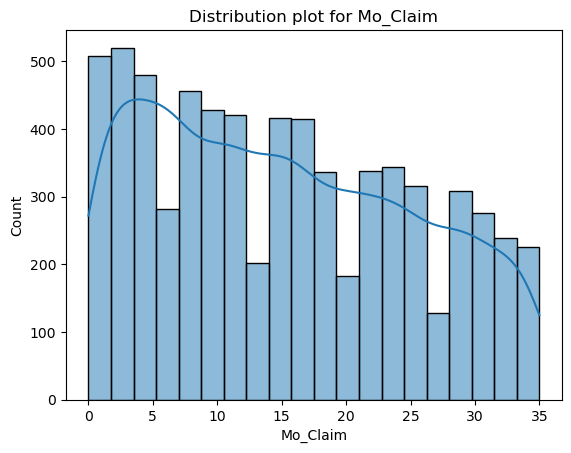

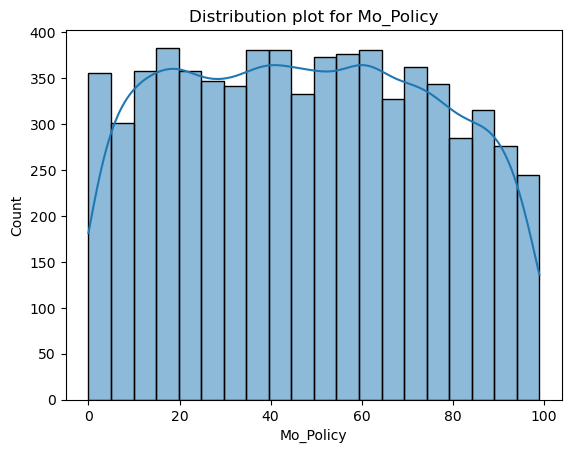

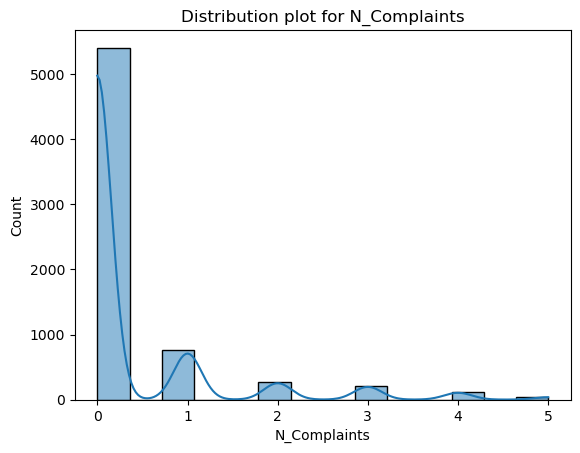

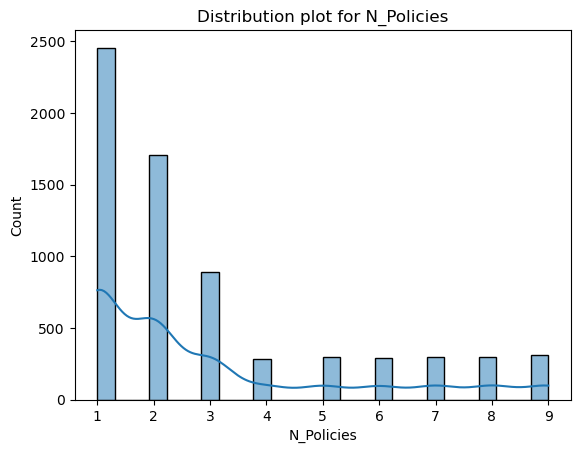

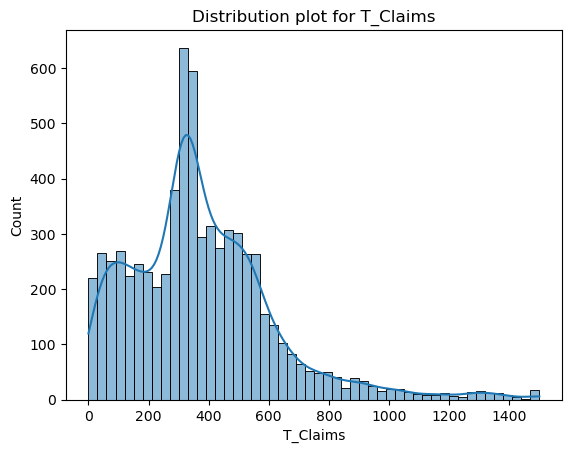

In [25]:
for cols in num_cols[:len(num_cols)-1]:
    sns.histplot(df1[cols], kde=True)
    plt.title(f"Distribution plot for {cols}")
    plt.show()

# Feature Engineering

In [26]:
# Adding two features to boost model performance

df1['Premium_per_policy'] = df1['M_Prem'] / (df1['N_Policies'] + 1)
df1['High_claim_risk'] = (df1['T_Claims']>1000).astype(int)


In [27]:
# Adding these columns to the existing numerical features

num_cols = list(num_cols) + ['CLV_log','Premium_per_policy', 'High_claim_risk']
cat_cols = list(cat_cols)

## Encoding categorical variables into numerical

In [28]:
df1 = pd.get_dummies(df1, columns=['Gender'])

In [29]:
cols_encode = ['State',
 'Coverage',
 'Education',
 'Emp_Status',
 'Loc_Code',
 'M_Status',
 'P_Type',
 'S_Channel',
 'V_Class',
 'V_Size']

In [30]:
# Label encoding other features
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for cols in cols_encode:
    le = LabelEncoder()
    df1[cols] = le.fit_transform(df1[cols])
    label_encoders[cols] = le

In [31]:
df1.head()

,State,Coverage,Education,Emp_Status,Income,Loc_Code,M_Status,M_Prem,Mo_Claim,Mo_Policy,N_Complaints,N_Policies,P_Type,S_Channel,T_Claims,V_Class,V_Size,CLV,Clipped_CLV,CLV_log,Premium_per_policy,High_claim_risk,Gender_F,Gender_M
0,4,0,0,1,56274,1,1,69,32,5,0,1,0,0,384.811147,5,1,2764,2764,7.924796,34.5,0,True,False
1,2,2,0,1,48767,1,1,108,18,38,0,2,1,0,566.472247,5,1,12887,12887,9.464052,36.0,0,True,False
2,4,0,0,1,43836,0,2,73,12,44,0,1,1,0,138.130879,0,1,2814,2814,7.942718,36.5,0,False,True
3,3,0,0,1,62902,0,1,69,14,94,0,2,1,3,159.383042,5,1,8256,8256,9.018817,23.0,0,True,False
4,3,0,1,1,55350,1,1,67,0,13,0,9,0,0,321.600000,0,1,5381,5381,8.590815,6.7,0,True,False


All the preprocessing steps have completed. Now we have to split the data into training and testing, after that we scale the features and run the model.

# Creating the ML Model

In [32]:
target = 'CLV_log'

Y = df1[target]

df2 = df1.copy()
df2.drop(columns=['CLV','Clipped_CLV','CLV_log'], inplace= True)  # dropping target variable from the dataset

X = df2

In [33]:
# Splitting training and testing dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [34]:
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror', random_state=42, device='cuda')

In [ ]:
# Hyper parameter tuning

# Using randomizedsearch cv to find the hyper-paramter space and then find the the optimal one using gridsearchcv

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_dist = {
    'n_estimators' : [100, 200, 300, 500],
    'max_depth' : [3, 5, 7, 10],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2],
    'subsample' : [0.6, 0.8, 1.0],
    'colsample_bytree' : [0.6, 0.8, 1.0],
    'min_child_weight' : [1, 3, 5]
}


In [ ]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter= 20,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=3,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("The best parameters for the model from RandomizedSearchCV is: ", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
The best parameters for the model from RandomizedSearchCV is:  {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


In [ ]:
# Fine tuning the parameter using GridSearchCV from the parameter space
param_d = {
    'n_estimators' : [250, 300, 350],
    'max_depth' : [3, 5, 7],
    'learning_rate' : [0.01, 0.05, 0.1],
    'subsample' : [0.8, 0.9, 1.0],
    'colsample_bytree' : [0.7, 0.8, 0.9],
    'min_child_weight' : [1, 2, 3]
}

gridsearch = GridSearchCV(
    estimator=model,
    param_grid=param_d,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

gridsearch.fit(X_train, y_train)

print("The best parameters from GridSearchCV is: ", gridsearch.best_params_)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
The best parameters from GridSearchCV is:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9}


In [ ]:
bestfit_model = gridsearch.best_estimator_

In [ ]:
# Saving the model incase of any unwanted errors
import joblib

joblib.dump(bestfit_model, 'xgb_clv_model.pkl')

['xgb_clv_model.pkl']

# Model Evaluation

In [ ]:
# import joblib
# bestfit_model = joblib.load("xgb_clv_model.pkl")

In [37]:
# Checking model performance on training set

from sklearn.metrics import root_mean_squared_error, r2_score

y_train_pred = bestfit_model.predict(X_train)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R2: {r2_train: .4f}")

Train RMSE: 0.14
Train R2:  0.9560


c:\Users\pandi\anaconda3\Lib\site-packages\xgboost\core.py:729: UserWarning: [15:47:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


In [38]:
# Checking feature importance

importances = bestfit_model.feature_importances_
feat_names = X_train.columns

feat_imp_df = pd.DataFrame(
    {
        'Feature' : feat_names,
        'Importance' : importances
    }
).sort_values(by='Importance', ascending=False)

print(feat_imp_df.head(10))

               Feature  Importance
11          N_Policies    0.468691
17  Premium_per_policy    0.132640
15             V_Class    0.095359
7               M_Prem    0.087310
18     High_claim_risk    0.078607
1             Coverage    0.042601
14            T_Claims    0.018871
19            Gender_F    0.008609
5             Loc_Code    0.007744
8             Mo_Claim    0.006627


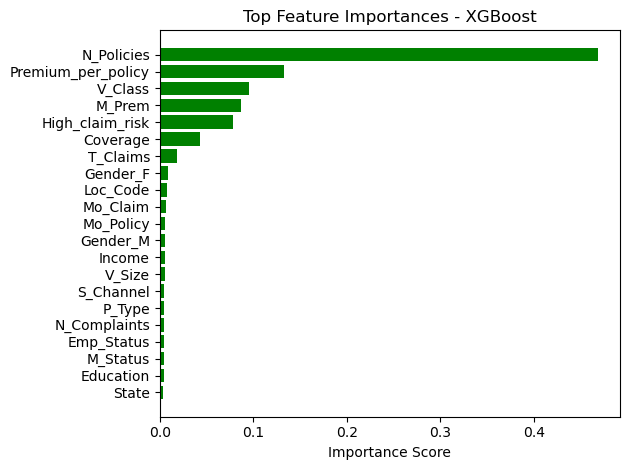

In [39]:
plt.Figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='green')
plt.gca().invert_yaxis()
plt.title("Top Feature Importances - XGBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [40]:
feat_imp_df

,Feature,Importance
11,N_Policies,0.468691
17,Premium_per_policy,0.132640
15,V_Class,0.095359
7,M_Prem,0.087310
18,High_claim_risk,0.078607
1,Coverage,0.042601
14,T_Claims,0.018871
19,Gender_F,0.008609
5,Loc_Code,0.007744
8,Mo_Claim,0.006627


In [41]:
# Now Training the model on important features

top_feat = feat_imp_df[feat_imp_df['Importance'] > 0.01]['Feature'].tolist()
X_train_imp = X_train[top_feat]

In [52]:
# Creating a new model to train on the important features

best_params = gridsearch.best_params_

red_model = XGBRegressor(
    objective="reg:squarederror",
    device='cuda',
    random_state=42,
    **best_params
)

red_model.fit(X_train_imp, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# red_model = joblib.load("xgb_clv_imp_model.pkl")

In [43]:
# Testing model performance on important features

y_train_pred_imp = red_model.predict(X_train_imp)

rmse_train_imp = root_mean_squared_error(y_train, y_train_pred_imp)
r2_train_imp = r2_score(y_train, y_train_pred_imp)

print(f"Train RMSE (Imp. Feat): {rmse_train_imp:.2f}")
print(f"Train R2 (Imp. Feat): {r2_train_imp: .4f}")

Train RMSE (Imp. Feat): 0.17
Train R2 (Imp. Feat):  0.9330


The model trained on the top features (imp_feat) performs slightly below the full-feature model, with an RMSE increase of just 0.03 and an R² reduction of only 2.3%. Despite this marginal drop in performance, the reduced model offers significant advantages: it requires fewer features, trains much faster, and is more efficient to deploy.

Given this trade-off between simplicity and performance, we choose to proceed with the model trained on the most important features, as it provides a strong balance between accuracy and computational efficiency.



In [55]:
# Saving the newly trained model

joblib.dump(red_model, 'xgb_clv_imp_model.pkl')

['xgb_clv_imp_model.pkl']

Checking the model performance on Test Dataset

In [45]:
X_test_imp = X_test[top_feat]

In [47]:
# Original model with all features

y_pred_full_log = bestfit_model.predict(X_test)


# New model with important features

y_pred_red_log = red_model.predict(X_test_imp)

In [48]:
# Converting the log transformed output into normal scale

y_test_actual = np.exp(y_test)

y_pred_full = np.exp(y_pred_full_log)
y_pred_red = np.exp(y_pred_red_log)

In [49]:
# Calculating the metrics for both the models on test dataset
from sklearn.metrics import mean_absolute_error

def evaluate_model(name, y_true, y_pred_log, y_pred_actual):
    print(f"{name} Performance:")
    print(f"R² (log scale): {r2_score(np.log(y_true), y_pred_log):.4f}")
    print(f"RMSE (log scale): {root_mean_squared_error(np.log(y_true), y_pred_log):.4f}")
    print(f"RMSE (original scale): {root_mean_squared_error(y_true, y_pred_actual):.2f}")
    print(f"MAE (original scale): {mean_absolute_error(y_true, y_pred_actual):.2f}")
    print("-" * 50)

evaluate_model("Model with all the Features", y_test_actual, y_pred_full_log, y_pred_full)
evaluate_model("Model with Important Features Only", y_test_actual, y_pred_red_log, y_pred_red)

Model with all the Features Performance:
R² (log scale): 0.9127
RMSE (log scale): 0.1941
RMSE (original scale): 3810.84
MAE (original scale): 1484.30
--------------------------------------------------
Model with Important Features Only Performance:
R² (log scale): 0.9008
RMSE (log scale): 0.2069
RMSE (original scale): 3988.47
MAE (original scale): 1589.57
--------------------------------------------------


From the metric we can infer that the model with less number of features have similar performance when compared to the one where all the features are used

In [51]:
# Accuracy within tolerance

accuracy_within_10 = (np.abs(y_test_actual - y_pred_red) / y_test_actual < 0.10).mean()
print(f"Accuracy within 10%: {accuracy_within_10: .2%}")

Accuracy within 10%:  74.05%


In [52]:
# MAPE
mape = np.mean(np.abs((y_test_actual - y_pred_red) / y_test_actual)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 10.28%


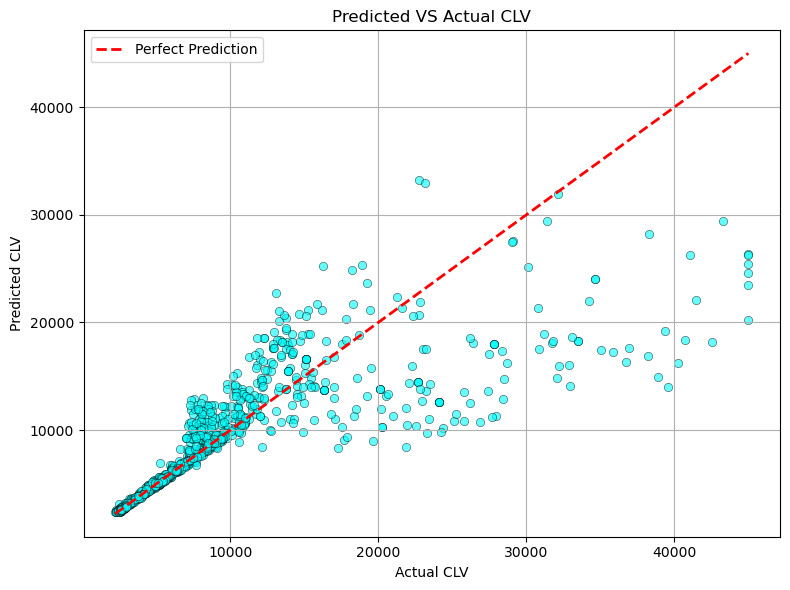

In [56]:
# Plotting the predicted vs actual values

plt.figure(figsize=(8,6))
sns.scatterplot(x = y_test_actual, y = y_pred_red, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.title("Predicted VS Actual CLV")
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The XGBoost regression model achieved an R² of 0.91 and a MAPE of 10.28%, with 74.05% of predictions falling within ±10% of actual CLV — demonstrating strong accuracy and reliability in predicting customer lifetime value.